<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Clustering</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data Preparation

In [2]:
from sklearn import datasets

n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(centers=3, n_samples=n_samples, random_state=random_state, center_box=(-10, 10))

# To play with
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X = np.random.rand(n_samples, 2)

No handles with labels found to put in legend.


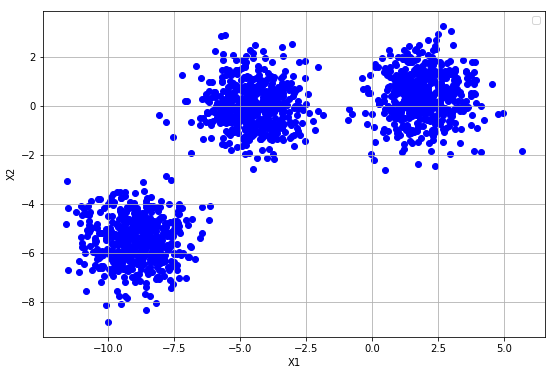

In [3]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X[:, 0],     # selects all objects with y == 0 and the 1st column of X
            X[:, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='b')        # label for the plot legend

plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

# Clustering

<center><img src="img/kmean1.png"></center>

In [4]:
def plot_clusters(X, y):

    # Create an figure with a custom size
    plt.figure(figsize=(9, 6))

    for cluster_label in np.unique(y):
        # Plot all objects with y == 0 (class 0)
        plt.scatter(X[y == cluster_label, 0],     # selects all objects with y == 0 and the 1st column of X
                    X[y == cluster_label, 1],     # selects all objects with y == 0 and the 2nd column of X
                    label=str(cluster_label))        # label for the plot legend

    plt.xlabel('X1') # set up X-axis label
    plt.ylabel('X2') # set up Y-axis label

    plt.legend(loc='best') # create the plot legend and set up it position
    plt.grid(b=1) # create grid on the plot

    plt.show() # display the plot

In [5]:
from sklearn.utils import resample


class MyKmeans(object):
    
    def __init__(self, n_clusters=2, max_iter=10, n_init=10, random_state=42):
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.n_init = n_init
        self.random_state = random_state
        
        
    def _predict_for_centers(self, cluster_centers, X):
        
        object_distances2 = []
        for one_cluster_center in cluster_centers:
            dist2 = ((X - one_cluster_center)**2).sum(axis=1)
            object_distances2.append(dist2)
        object_distances2 = np.array(object_distances2)
        labels = np.argmin(object_distances2, axis=0)
        
        return labels
    
    
    def _calculate_cluster_centers(self, X, y):
        
        cluster_centers = []
        cluster_labels = np.unique(y)
        
        for one_cluster_label in cluster_labels:
            one_cluster_center = X[y == one_cluster_label].mean(axis=0)
            cluster_centers.append(one_cluster_center)
            
        return np.array(cluster_centers)
    
    
    def _calculate_cluster_metric(self, cluster_centers, X):
        
        object_distances2 = []
        for one_cluster_center in cluster_centers:
            dist2 = ((X - one_cluster_center)**2).sum(axis=1)
            object_distances2.append(dist2)
        object_distances2 = np.array(object_distances2)
        
        return object_distances2.mean()
    
    
    def _fit_one_time(self, X, cluster_centers):
        
        for i in range(self.max_iter):
            labels = self._predict_for_centers(cluster_centers, X)
            cluster_centers = self._calculate_cluster_centers(X, labels)
            
        return cluster_centers
    
        
        
    def fit(self, X):
        
        self.best_cluster_centers = None
        self.best_metric = np.inf
        
        for i in range(self.n_init):
            
            cluster_centers_init = resample(X, n_samples=self.n_clusters, random_state=None, replace=False)
            cluster_centers = self._fit_one_time(X, cluster_centers_init)
            metric = self._calculate_cluster_metric(cluster_centers, X)
            
            if metric < self.best_metric:
                self.best_metric = metric
                self.best_cluster_centers = cluster_centers
                
    
    def predict(self, X):
        
        y = self._predict_for_centers(self.best_cluster_centers, X)
        
        return y

In [6]:
clusterer = MyKmeans(n_clusters=3, max_iter=10, n_init=10, random_state=42)
clusterer.fit(X)
y_pred = clusterer.predict(X)

In [7]:
y_pred[:10]

array([1, 1, 2, 1, 1, 0, 2, 2, 2, 0])

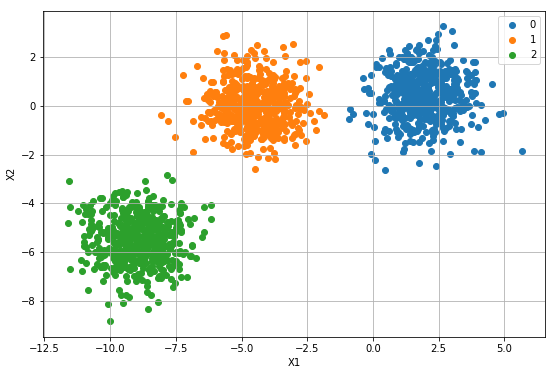

In [8]:
plot_clusters(X, y_pred)

# Metrics

**Silhouette Score:**

$$
s = \frac{b - a}{max(a, b)}
$$

- **a**: The mean distance between a sample and all other points in the same class.
- **b**: The mean distance between a sample and all other points in the next nearest cluster.


**Adjusted Rand Index (ARI):**

$$
ARI = \frac{RI - Expected\_RI}{max(RI) - Expected\_RI}
$$

$$
RI = \frac{a + b}{a + b + c + d}
$$


- a, the number of pairs of elements in S that are in the same subset in X and in the same subset in Y
- b, the number of pairs of elements in S that are in different subsets in X and in different subsets in Y
- c, the number of pairs of elements in S that are in the same subset in X and in different subsets in Y
- d, the number of pairs of elements in S that are in different subsets in X and in the same subset in Y

In [9]:
from sklearn import metrics

silhouette_score_values = []
adjusted_rand_score_values = []
n_clusters = np.arange(2, 21)

for n in n_clusters:
    
    clusterer = MyKmeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)
    
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)
    
    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)

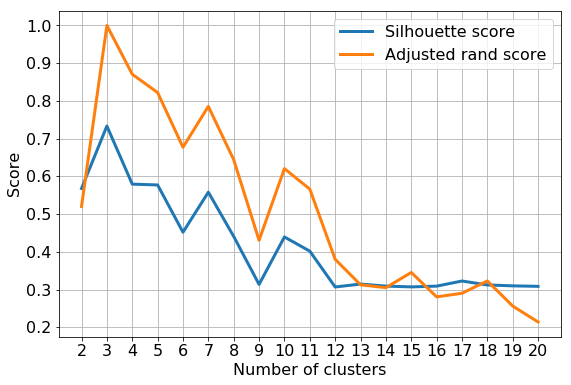

In [10]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.grid(b=1)
plt.show()

# Real Data Example (Additional)

In [11]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

gradyear gender     age  friends  basketball  football  soccer  softball  \
0      2006      M  18.982        7           0         0       0         0   
1      2006      F  18.801        0           0         1       0         0   
2      2006      M  18.335       69           0         1       0         0   
3      2006      F  18.875        0           0         0       0         0   
4      2006    NaN  18.995       10           0         0       0         0   

   volleyball  swimming  ...    blonde  mall  shopping  clothes  hollister  \
0           0         0  ...         0     0         0        0          0   
1           0         0  ...         0     1         0        0          0   
2           0         0  ...         0     0         0        0          0   
3           0         0  ...         0     0         0        0          0   
4           0         0  ...         0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  
3            0    0      0      0      0  
4            0    0      0      1      1  

[5 rows x 40 columns]

The sample has columns: 
* Year of creation
* Gender
* Age
* Number of friends
* 36 keywords that are found in the facebook profile (interests, community, meetings)

## Create Matrix X

In [12]:
df_sns.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [13]:
word_cols = ['basketball', 'football',
             'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
             'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
             'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
             'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
             'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

X = df_sns[word_cols].values

## Clustering

In [14]:
clusterer = MyKmeans(n_clusters=9, max_iter=10, n_init=10)
clusterer.fit(X)
y_pred = clusterer.predict(X)

In [15]:
metrics.silhouette_score(X, y_pred)

0.20220872327630163

In [16]:
clusterer.best_cluster_centers

array([[0.45709828, 0.39937598, 0.27301092, 0.29953198, 3.38221529,
        0.19188768, 0.13104524, 0.12948518, 0.08892356, 0.26677067,
        0.34321373, 0.12324493, 0.12480499, 0.15132605, 0.07800312,
        0.34945398, 0.18720749, 0.01560062, 0.56162246, 0.22464899,
        0.40873635, 0.29797192, 0.1201248 , 0.02808112, 0.31669267,
        0.12636505, 0.11232449, 0.27613105, 0.53198128, 0.14664587,
        0.11856474, 0.09048362, 0.11856474, 0.09672387, 0.074883  ,
        0.04212168],
       [0.47584187, 0.50366032, 0.31844802, 0.20717423, 0.19180088,
        0.27891654, 0.22620791, 0.25036603, 0.15959004, 0.44802343,
        0.89019034, 2.17935578, 0.39458272, 0.30527086, 1.05051245,
        0.80819912, 0.70131772, 0.05710102, 1.79282577, 0.86090776,
        0.76939971, 0.35578331, 0.1317716 , 0.03001464, 3.88140556,
        0.34260615, 0.79282577, 0.73060029, 0.6090776 , 0.67057101,
        0.23572474, 0.19692533, 0.7920937 , 0.34187408, 0.45900439,
        0.5431918 ],
      